# Goal: Data proecessing and create tranition matrix

#### - import necessary libraries

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta

import plotly.express as pt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### - import data and combine

In [15]:
# read all csv files
globbed_files = glob.glob("*day.csv")

In [16]:
# create list of all days from different csv files
data = []

for csv in globbed_files:
    frame = pd.read_csv(csv, sep=';')
    frame['day'] = os.path.splitext(csv)[0] # add column with filename that represent the day
    data.append(frame)

In [17]:
# concat all list into a dataframe
df = pd.concat([data[0], data[1], data[2], data[3], data[4]], axis=0)

In [18]:
df['day'].unique()

array(['tuesday', 'monday', 'thursday', 'wednesday', 'friday'],
      dtype=object)

In [19]:
# let's view first few rows
df.head(5)

,timestamp,customer_no,location,day
0,2019-09-03 07:02:00,1,fruit,tuesday
1,2019-09-03 07:02:00,2,drinks,tuesday
2,2019-09-03 07:03:00,3,dairy,tuesday
3,2019-09-03 07:05:00,1,drinks,tuesday
4,2019-09-03 07:06:00,4,dairy,tuesday


#### - create unique id for each customer

In [20]:
# find how many max digits we have within a day
df['customer_no'].max()

1535

In [21]:
# create a four digit id
df['ID'] = df['customer_no'].apply(lambda x: '{0:0>4}'.format(x))

In [26]:
df['ID'].nunique()

1535

In [25]:
df['ID'].count()

24877

In [28]:
# it seems there are duplicate ids, let's create unique id of each day
dummy = pd.get_dummies(df['day'])
dummy['week_code'] = dummy.astype(str).agg(''.join,axis=1)
dummy

,friday,monday,thursday,tuesday,wednesday,week_code
0,0,0,0,1,0,00010
1,0,0,0,1,0,00010
2,0,0,0,1,0,00010
3,0,0,0,1,0,00010
4,0,0,0,1,0,00010
...,...,...,...,...,...,...
5120,1,0,0,0,0,10000
5121,1,0,0,0,0,10000
5122,1,0,0,0,0,10000
5123,1,0,0,0,0,10000


In [29]:
dummy['week_code'].unique()

array(['00010', '01000', '00100', '00001', '10000'], dtype=object)

In [30]:
# join unique day id with df
df = pd.concat([df, dummy['week_code']], axis=1)

In [31]:
df

,timestamp,customer_no,location,day,ID,week_code
0,2019-09-03 07:02:00,1,fruit,tuesday,0001,00010
1,2019-09-03 07:02:00,2,drinks,tuesday,0002,00010
2,2019-09-03 07:03:00,3,dairy,tuesday,0003,00010
3,2019-09-03 07:05:00,1,drinks,tuesday,0001,00010
4,2019-09-03 07:06:00,4,dairy,tuesday,0004,00010
...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday,1500,10000
5121,2019-09-06 21:50:00,1507,checkout,friday,1507,10000
5122,2019-09-06 21:50:00,1508,checkout,friday,1508,10000
5123,2019-09-06 21:50:00,1509,drinks,friday,1509,10000


In [32]:
# merge day id and customer id to create unique id
df['ID'] = df['week_code'] + df['ID']

In [33]:
df

,timestamp,customer_no,location,day,ID,week_code
0,2019-09-03 07:02:00,1,fruit,tuesday,000100001,00010
1,2019-09-03 07:02:00,2,drinks,tuesday,000100002,00010
2,2019-09-03 07:03:00,3,dairy,tuesday,000100003,00010
3,2019-09-03 07:05:00,1,drinks,tuesday,000100001,00010
4,2019-09-03 07:06:00,4,dairy,tuesday,000100004,00010
...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday,100001500,10000
5121,2019-09-06 21:50:00,1507,checkout,friday,100001507,10000
5122,2019-09-06 21:50:00,1508,checkout,friday,100001508,10000
5123,2019-09-06 21:50:00,1509,drinks,friday,100001509,10000


In [35]:
# let's find the total number of customers
df['ID'].nunique()

7445

#### -Calculate the total number of customers in each section

In [36]:
df.groupby(['day', 'ID']).count()

timestamp  customer_no  location  week_code
day       ID                                                    
friday    100000001          3            3         3          3
          100000002          2            2         2          2
          100000003          4            4         4          4
          100000004          2            2         2          2
          100000005          6            6         6          6
...                        ...          ...       ...        ...
wednesday 000011527          3            3         3          3
          000011528          2            2         2          2
          000011529          3            3         3          3
          000011530          3            3         3          3
          000011531          2            2         2          2

[7445 rows x 4 columns]

In [37]:
total_customer_day = df.groupby(['day', 'location']).size().to_frame()

In [38]:
total_customer_day

0
day       location      
friday    checkout  1502
          dairy      932
          drinks     844
          fruit     1057
          spices     790
monday    checkout  1437
          dairy      895
          drinks     797
          fruit     1005
          spices     750
thursday  checkout  1532
          dairy      965
          drinks     776
          fruit     1041
          spices     790
tuesday   checkout  1420
          dairy      911
          drinks     713
          fruit      976
          spices     694
wednesday checkout  1526
          dairy      976
          drinks     775
          fruit     1043
          spices     730

In [39]:
total_customer_day.reset_index(inplace=True)

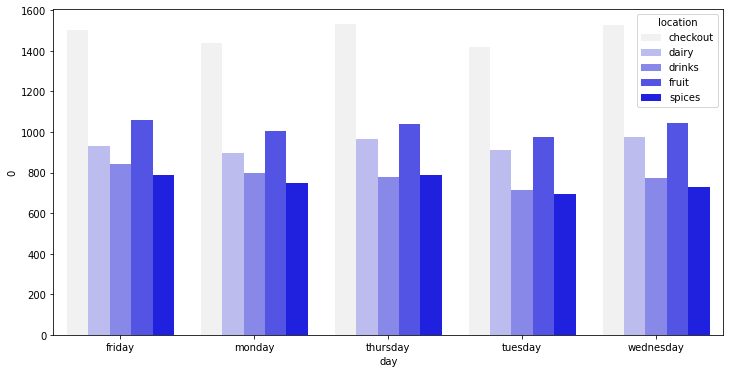

In [40]:
# let's visualize distribution of customers each section per day
bar = sns.barplot(x='day', y=total_customer_day[0], data=total_customer_day, estimator=sum, ci=None, hue='location',  color='blue')

#### - Create entry Time

In [41]:
entry = df.groupby('ID')['timestamp']

In [42]:
df = df.assign(enter_at=entry.transform(min))

In [44]:
# let's check how does it look
df.loc[df['ID'] == '000100001']

,timestamp,customer_no,location,day,ID,week_code,enter_at
0,2019-09-03 07:02:00,1,fruit,tuesday,000100001,00010,2019-09-03 07:02:00
3,2019-09-03 07:05:00,1,drinks,tuesday,000100001,00010,2019-09-03 07:02:00
25,2019-09-03 07:12:00,1,checkout,tuesday,000100001,00010,2019-09-03 07:02:00


In [26]:
df['entry'] = np.where(df['timestamp'] == df['enter_at'], True, False)

In [27]:
df.loc[df['ID'] == '000100001']

,timestamp,customer_no,location,day,ID,week_code,enter_at,entry
0,2019-09-03 07:02:00,1,fruit,tuesday,000100001,00010,2019-09-03 07:02:00,True
3,2019-09-03 07:05:00,1,drinks,tuesday,000100001,00010,2019-09-03 07:02:00,False
25,2019-09-03 07:12:00,1,checkout,tuesday,000100001,00010,2019-09-03 07:02:00,False


In [28]:
df.loc[df['entry'] == True].groupby(['day','location']).size()

day        location
friday     dairy       398
           drinks      234
           fruit       586
           spices      292
monday     dairy       412
           drinks      232
           fruit       520
           spices      283
thursday   dairy       453
           drinks      218
           fruit       566
           spices      298
tuesday    dairy       416
           drinks      220
           fruit       559
           spices      227
wednesday  dairy       462
           drinks      239
           fruit       579
           spices      251
dtype: int64

### Create row for entry

In [29]:
df_test = df.groupby('ID')

In [30]:
df_test

In [31]:
entry_row = df.loc[df['entry'] == True]

In [32]:
entry_row['location'] = 'checkin'
entry_row

,timestamp,customer_no,location,day,ID,week_code,enter_at,entry
0,2019-09-03 07:02:00,1,checkin,tuesday,000100001,00010,2019-09-03 07:02:00,True
1,2019-09-03 07:02:00,2,checkin,tuesday,000100002,00010,2019-09-03 07:02:00,True
2,2019-09-03 07:03:00,3,checkin,tuesday,000100003,00010,2019-09-03 07:03:00,True
4,2019-09-03 07:06:00,4,checkin,tuesday,000100004,00010,2019-09-03 07:06:00,True
5,2019-09-03 07:06:00,5,checkin,tuesday,000100005,00010,2019-09-03 07:06:00,True
...,...,...,...,...,...,...,...,...
5112,2019-09-06 21:48:00,1506,checkin,friday,100001506,10000,2019-09-06 21:48:00,True
5113,2019-09-06 21:48:00,1507,checkin,friday,100001507,10000,2019-09-06 21:48:00,True
5114,2019-09-06 21:48:00,1508,checkin,friday,100001508,10000,2019-09-06 21:48:00,True
5123,2019-09-06 21:50:00,1509,checkin,friday,100001509,10000,2019-09-06 21:50:00,True


In [33]:
X = 1
entry_row['timestamp'] = pd.to_datetime(entry_row['timestamp']) - datetime.timedelta(seconds=X)

In [34]:
entry_row

,timestamp,customer_no,location,day,ID,week_code,enter_at,entry
0,2019-09-03 07:01:59,1,checkin,tuesday,000100001,00010,2019-09-03 07:02:00,True
1,2019-09-03 07:01:59,2,checkin,tuesday,000100002,00010,2019-09-03 07:02:00,True
2,2019-09-03 07:02:59,3,checkin,tuesday,000100003,00010,2019-09-03 07:03:00,True
4,2019-09-03 07:05:59,4,checkin,tuesday,000100004,00010,2019-09-03 07:06:00,True
5,2019-09-03 07:05:59,5,checkin,tuesday,000100005,00010,2019-09-03 07:06:00,True
...,...,...,...,...,...,...,...,...
5112,2019-09-06 21:47:59,1506,checkin,friday,100001506,10000,2019-09-06 21:48:00,True
5113,2019-09-06 21:47:59,1507,checkin,friday,100001507,10000,2019-09-06 21:48:00,True
5114,2019-09-06 21:47:59,1508,checkin,friday,100001508,10000,2019-09-06 21:48:00,True
5123,2019-09-06 21:49:59,1509,checkin,friday,100001509,10000,2019-09-06 21:50:00,True


In [35]:
df = df.append(entry_row, ignore_index=True, sort=True)

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [37]:
df['location'].unique()

array(['fruit', 'drinks', 'dairy', 'spices', 'checkout', 'checkin'],
      dtype=object)

In [38]:
df.sort_values(by=['ID', 'timestamp'], inplace=True)

### Get Checkout Time

In [39]:
checkout = df.groupby('ID')['timestamp']

In [40]:
df = df.assign(checkout_at=checkout.transform(max))

In [41]:
df.loc[df['ID'] == '000100001']

,ID,customer_no,day,enter_at,entry,location,timestamp,week_code,checkout_at
24877,000100001,1,tuesday,2019-09-03 07:02:00,True,checkin,2019-09-03 07:01:59,00010,2019-09-03 07:12:00
0,000100001,1,tuesday,2019-09-03 07:02:00,True,fruit,2019-09-03 07:02:00,00010,2019-09-03 07:12:00
3,000100001,1,tuesday,2019-09-03 07:02:00,False,drinks,2019-09-03 07:05:00,00010,2019-09-03 07:12:00
25,000100001,1,tuesday,2019-09-03 07:02:00,False,checkout,2019-09-03 07:12:00,00010,2019-09-03 07:12:00


In [42]:
df['checkout'] = np.where(df['timestamp'] == df['checkout_at'], True, False)

In [43]:
df.loc[df['ID'] == '000100001']

,ID,customer_no,day,enter_at,entry,location,timestamp,week_code,checkout_at,checkout
24877,000100001,1,tuesday,2019-09-03 07:02:00,True,checkin,2019-09-03 07:01:59,00010,2019-09-03 07:12:00,False
0,000100001,1,tuesday,2019-09-03 07:02:00,True,fruit,2019-09-03 07:02:00,00010,2019-09-03 07:12:00,False
3,000100001,1,tuesday,2019-09-03 07:02:00,False,drinks,2019-09-03 07:05:00,00010,2019-09-03 07:12:00,False
25,000100001,1,tuesday,2019-09-03 07:02:00,False,checkout,2019-09-03 07:12:00,00010,2019-09-03 07:12:00,True


In [44]:
df.loc[df['checkout'] == True].groupby(['location']).size()

location
checkout    7417
dairy         14
drinks         2
fruit          7
spices         5
dtype: int64

In [91]:
checkout_all = df.loc[df['checkout'] == True]

In [92]:
checkout_without_purchase = checkout_all.loc[checkout_all['location'] != 'checkout']

In [93]:
checkout_without_purchase.groupby('day').size()

day
friday        8
monday       10
thursday      3
tuesday       2
wednesday     5
dtype: int64

In [90]:
df.loc[df['location'] == 'checkout'].groupby(['day','location']).size()

day        location
friday     checkout    1510
monday     checkout    1447
thursday   checkout    1535
tuesday    checkout    1422
wednesday  checkout    1531
dtype: int64

In [48]:
checkout_row = df.loc[((df['checkout'] == True ) & (df['location'] != 'checkout'))]

In [49]:
checkout_row['location'] = 'checkout'
checkout_row

,ID,customer_no,day,enter_at,entry,location,timestamp,week_code,checkout_at,checkout
19748,000011520,1520,wednesday,2019-09-04 21:40:00,False,checkout,2019-09-04 21:49:00,00001,2019-09-04 21:49:00,True
19742,000011527,1527,wednesday,2019-09-04 21:44:00,False,checkout,2019-09-04 21:47:00,00001,2019-09-04 21:47:00,True
19747,000011528,1528,wednesday,2019-09-04 21:45:00,False,checkout,2019-09-04 21:48:00,00001,2019-09-04 21:48:00,True
19749,000011529,1529,wednesday,2019-09-04 21:45:00,False,checkout,2019-09-04 21:49:00,00001,2019-09-04 21:49:00,True
19750,000011530,1530,wednesday,2019-09-04 21:46:00,False,checkout,2019-09-04 21:49:00,00001,2019-09-04 21:49:00,True
4713,000101411,1411,tuesday,2019-09-03 21:29:00,False,checkout,2019-09-03 21:50:00,00010,2019-09-03 21:50:00,True
4710,000101422,1422,tuesday,2019-09-03 21:46:00,False,checkout,2019-09-03 21:47:00,00010,2019-09-03 21:47:00,True
14694,001001527,1527,thursday,2019-09-05 21:35:00,False,checkout,2019-09-05 21:47:00,00100,2019-09-05 21:47:00,True
14696,001001532,1532,thursday,2019-09-05 21:48:00,True,checkout,2019-09-05 21:48:00,00100,2019-09-05 21:48:00,True
14697,001001533,1533,thursday,2019-09-05 21:48:00,True,checkout,2019-09-05 21:48:00,00100,2019-09-05 21:48:00,True


In [50]:
X = 1
checkout_row['timestamp'] = pd.to_datetime(checkout_row['timestamp']) + datetime.timedelta(minutes=X)

In [51]:
checkout_row.count()

ID             28
customer_no    28
day            28
enter_at       28
entry          28
location       28
timestamp      28
week_code      28
checkout_at    28
checkout       28
dtype: int64

In [52]:
df = df.append(checkout_row, ignore_index=True, sort=True)

In [53]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [54]:
df['location'].unique()

array(['checkin', 'fruit', 'checkout', 'dairy', 'spices', 'drinks'],
      dtype=object)

In [55]:
df.sort_values(by=['ID', 'timestamp'], inplace=True)

In [75]:
len(set(df['ID']))

7445

### Time Spent (total)

In [76]:
df['time_spent'] = (pd.to_datetime(df['checkout_at']) - pd.to_datetime(df['enter_at']))

In [77]:
df['time_spent_m'] = df['time_spent'].dt.components['minutes']

In [104]:
df['time_spent_m'].mean()

8.228748068006182

### Sequencing

In [81]:
df['sequence'] = df.groupby(['ID']).cumcount()+0

In [82]:
df[['timestamp', 'ID', 'location', 'sequence']]

,timestamp,ID,location,sequence
0,2019-09-04 06:59:59,000010001,checkin,0
1,2019-09-04 07:00:00,000010001,fruit,1
2,2019-09-04 07:02:00,000010001,checkout,2
3,2019-09-04 06:59:59,000010002,checkin,0
4,2019-09-04 07:00:00,000010002,dairy,1
...,...,...,...,...
32319,2019-09-06 21:50:00,100001509,drinks,1
32348,2019-09-06 21:51:00,100001509,checkout,2
32320,2019-09-06 21:49:59,100001510,checkin,0
32321,2019-09-06 21:50:00,100001510,spices,1


In [84]:
df.sort_values(by=['ID', 'timestamp'])

,ID,checkout,checkout_at,customer_no,day,enter_at,entry,location,timestamp,week_code,time_spent,time_spent_m,sequence
0,000010001,False,2019-09-04 07:02:00,1,wednesday,2019-09-04 07:00:00,True,checkin,2019-09-04 06:59:59,00001,0 days 00:02:00,2,0
1,000010001,False,2019-09-04 07:02:00,1,wednesday,2019-09-04 07:00:00,True,fruit,2019-09-04 07:00:00,00001,0 days 00:02:00,2,1
2,000010001,True,2019-09-04 07:02:00,1,wednesday,2019-09-04 07:00:00,False,checkout,2019-09-04 07:02:00,00001,0 days 00:02:00,2,2
3,000010002,False,2019-09-04 07:06:00,2,wednesday,2019-09-04 07:00:00,True,checkin,2019-09-04 06:59:59,00001,0 days 00:06:00,6,0
4,000010002,False,2019-09-04 07:06:00,2,wednesday,2019-09-04 07:00:00,True,dairy,2019-09-04 07:00:00,00001,0 days 00:06:00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32319,100001509,True,2019-09-06 21:50:00,1509,friday,2019-09-06 21:50:00,True,drinks,2019-09-06 21:50:00,10000,0 days 00:00:00,0,1
32348,100001509,True,2019-09-06 21:50:00,1509,friday,2019-09-06 21:50:00,True,checkout,2019-09-06 21:51:00,10000,0 days 00:00:00,0,2
32320,100001510,False,2019-09-06 21:50:00,1510,friday,2019-09-06 21:50:00,True,checkin,2019-09-06 21:49:59,10000,0 days 00:00:00,0,0
32321,100001510,True,2019-09-06 21:50:00,1510,friday,2019-09-06 21:50:00,True,spices,2019-09-06 21:50:00,10000,0 days 00:00:00,0,1


In [85]:
df['sequence'].max()

18

In [86]:
df['location'].unique()

array(['checkin', 'fruit', 'checkout', 'dairy', 'spices', 'drinks'],
      dtype=object)

In [87]:
seq_1 = df.loc[df['sequence'] == 1]
seq_2 = df.loc[df['sequence'] == 2]

location
dairy     AxesSubplot(0.125,0.125;0.775x0.755)
drinks    AxesSubplot(0.125,0.125;0.775x0.755)
fruit     AxesSubplot(0.125,0.125;0.775x0.755)
spices    AxesSubplot(0.125,0.125;0.775x0.755)
Name: location, dtype: object

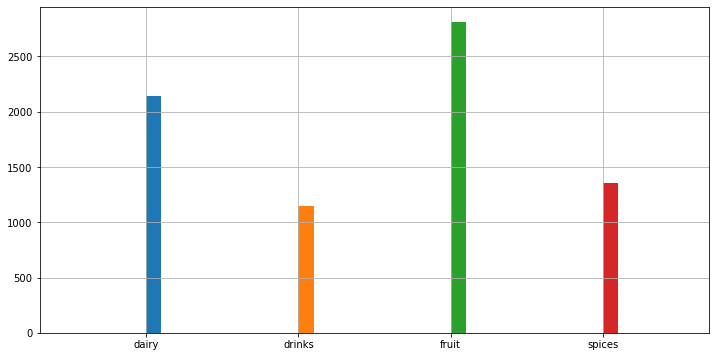

In [88]:
seq_1.groupby('location')['location'].hist()

location
checkout    AxesSubplot(0.125,0.125;0.775x0.755)
dairy       AxesSubplot(0.125,0.125;0.775x0.755)
drinks      AxesSubplot(0.125,0.125;0.775x0.755)
fruit       AxesSubplot(0.125,0.125;0.775x0.755)
spices      AxesSubplot(0.125,0.125;0.775x0.755)
Name: location, dtype: object

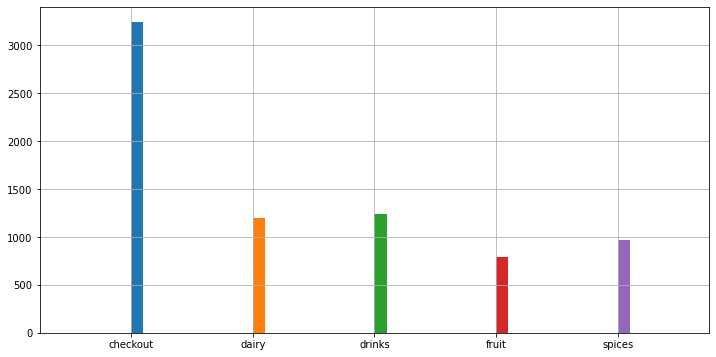

In [89]:
seq_2.groupby('location')['location'].hist()

In [ ]:
df[['timestamp', 'ID', 'location','sequence']].loc[df['ID'] < '000100100']

### test transition matrix

In [ ]:
df_test = df[['timestamp', 'ID', 'location','sequence']].loc[df['ID'] < '000100100']

In [ ]:
df_test.sort_values(by=['ID', 'timestamp'])

In [ ]:
df_test['shift'] = df_test.groupby(['ID'])['location'].shift(-1)

In [ ]:
df_test.sort_values(by=['ID', 'timestamp'])

In [ ]:
pd.crosstab(df_test['location'], df_test['shift'])

In [ ]:
round(pd.crosstab(df_test['location'], df_test['shift'], normalize=0), 2)

In [ ]:
pd.to_datetime(df['timestamp']).dt.day.unique()

In [100]:
df.to_hdf('input_t_mat.h5', key='df', mode='w')

In [ ]:
df['ID']

In [ ]:
df['ID'] = [str(x) for x in df['ID']]

In [ ]:
df.to_csv('input_t_mat.csv')

In [99]:
df['checkout'].describe()

count     32350
unique        2
top       False
freq      24877
Name: checkout, dtype: object